# Implement two-complement subtractor

## Check adder

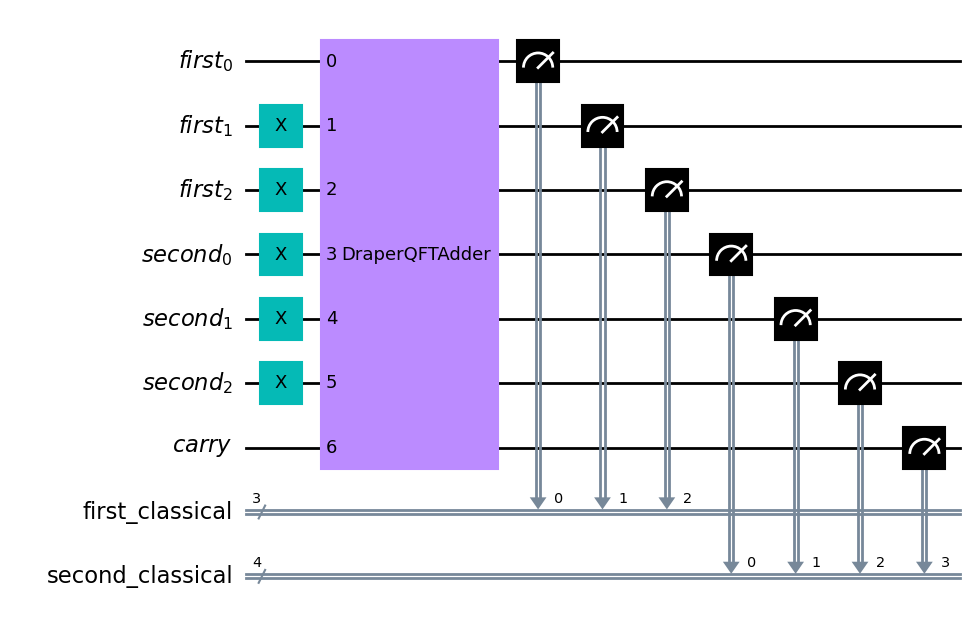

In [1]:
from qiskit.circuit.library import DraperQFTAdder
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

def loadNumber(circ: QuantumCircuit, register: QuantumRegister, number: int):
    number_in_binary = '0'*(register.size - len(bin(number)[2:])) + bin(number)[2:]
    
    for i in range(len(number_in_binary)):
        if number_in_binary[::-1][i] == '1':
            circ.x(register[i])
            
            
bitLength = 3

firstRegister = QuantumRegister(bitLength, 'first')
secondRegister = QuantumRegister(bitLength, 'second')
carryRegister = QuantumRegister(1, 'carry')

first_classical = ClassicalRegister(bitLength, 'first_classical')
second_classical = ClassicalRegister(bitLength+1, 'second_classical')

test_circuit = QuantumCircuit(firstRegister, secondRegister, carryRegister, first_classical, second_classical)

firstNumber = 6
secondNumber = 7

loadNumber(test_circuit, firstRegister, firstNumber)
loadNumber(test_circuit, secondRegister, secondNumber)

adder = DraperQFTAdder(bitLength, kind="half")

test_circuit.append(adder, firstRegister[:] + secondRegister[:] + carryRegister[:])
test_circuit.measure(firstRegister, first_classical)
test_circuit.measure(secondRegister[:]+carryRegister[:], second_classical)
test_circuit.draw(output='mpl')

In [2]:
job = execute(test_circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts()
print(counts)

{'1101 110': 1000}


## Increment by one

In [3]:
from qiskit.circuit.library import MCXGate

class OneIncrement():
    def __init__(self, num_qubits):
        compute_register = QuantumRegister(num_qubits, 'compute')
        self.circuit = QuantumCircuit(compute_register)
        self.circuit.x(compute_register[0])
        self.circuit.cx(compute_register[0], compute_register[1], ctrl_state=0)
        for i in range(2, num_qubits):
            mcxGate = MCXGate(num_ctrl_qubits=i, ctrl_state="0"*i)
            self.circuit.append(mcxGate, compute_register[:i+1])
            


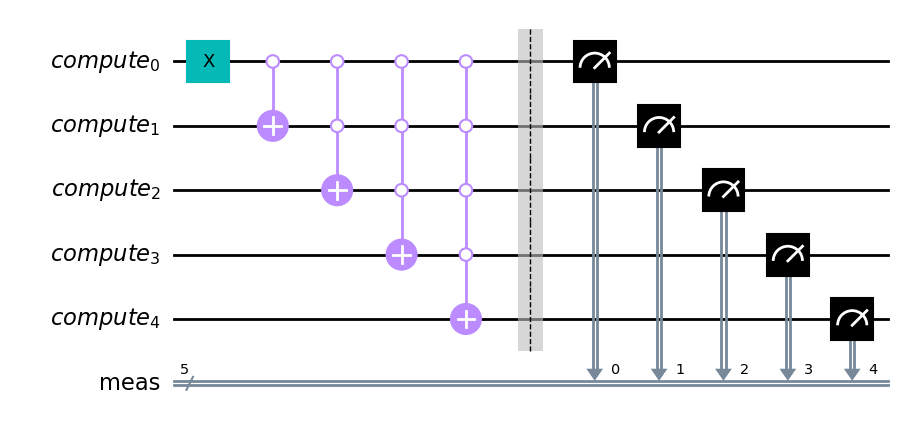

In [4]:
one_increment = OneIncrement(5)
one_increment.circuit.measure_all()
one_increment.circuit.draw(output='mpl')

In [7]:
def resultToNumber(counts: dict):
    results_dict = {}
    for keys, value in counts.items():
        # output = int(splitted_measurements[1], 2)
        first_number = int(keys, 2)
        results_dict[first_number] = value
    return results_dict

bit_length = 4
numberRegister = QuantumRegister(bit_length, 'q')
for i in range(2**bit_length-1):

    circ = QuantumCircuit(numberRegister)
    loadNumber(circ, numberRegister, i)
    one_increment = OneIncrement(bit_length)
    circ.append(one_increment.circuit, circ.qubits)
    circ.measure_all()
    job = execute(circ, Aer.get_backend('qasm_simulator'), shots=1000)
    counts = job.result().get_counts()
    counts = resultToNumber(counts)
    print("number: ", i, "counts", counts)
    

number:  0 counts {1: 1000}
number:  1 counts {2: 1000}
number:  2 counts {3: 1000}
number:  3 counts {4: 1000}
number:  4 counts {5: 1000}
number:  5 counts {6: 1000}
number:  6 counts {7: 1000}
number:  7 counts {8: 1000}
number:  8 counts {9: 1000}
number:  9 counts {10: 1000}
number:  10 counts {11: 1000}
number:  11 counts {12: 1000}
number:  12 counts {13: 1000}
number:  13 counts {14: 1000}
number:  14 counts {15: 1000}


## Check subtractor

In [16]:
class Subtractor():
    def __init__(self, bitLength):
        firstRegister = QuantumRegister(bitLength, 'first')
        secondRegister = QuantumRegister(bitLength, 'second')
        carryRegister = QuantumRegister(1, 'carry')

        test_circuit = QuantumCircuit(firstRegister, secondRegister, carryRegister, name="subtractor")
        
        adder = DraperQFTAdder(bitLength, kind="half")
        oneIncrementer = OneIncrement(bitLength+1).circuit
        test_circuit.x(secondRegister[:]+carryRegister[:])
        test_circuit.append(adder, firstRegister[:] + secondRegister[:] + carryRegister[:])
        test_circuit.append(oneIncrementer, secondRegister[:]+ carryRegister[:])
        self.circuit = test_circuit


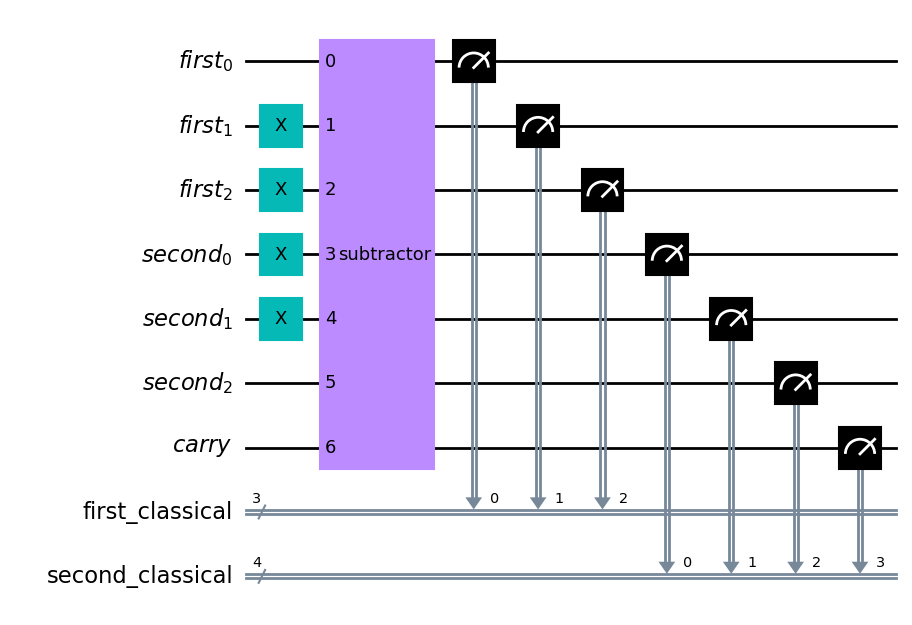

In [17]:
firstRegister = QuantumRegister(bitLength, 'first')
secondRegister = QuantumRegister(bitLength, 'second')
carryRegister = QuantumRegister(1, 'carry')

first_classical = ClassicalRegister(bitLength, 'first_classical')
second_classical = ClassicalRegister(bitLength+1, 'second_classical')

test_circuit = QuantumCircuit(firstRegister, secondRegister, carryRegister, first_classical, second_classical)

firstNumber = 6
secondNumber = 3

loadNumber(test_circuit, firstRegister, firstNumber)
loadNumber(test_circuit, secondRegister, secondNumber)

subtractor = Subtractor(bitLength).circuit

test_circuit.append(subtractor, firstRegister[:]+ secondRegister[:] + carryRegister[:])
test_circuit.measure(firstRegister, first_classical)
test_circuit.measure(secondRegister[:]+carryRegister[:], second_classical)
test_circuit.draw(output='mpl')

In [18]:
job = execute(test_circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts()
print(counts)

{'0011 110': 1000}


In [20]:
def resultToNumber(counts: dict):
    results_dict = {}
    for keys, value in counts.items():
        splitted_measurements = keys.split(' ')
        first_number = int(splitted_measurements[0], 2)
        results_dict[first_number] = value
    return results_dict

bitLength = 3

firstRegister = QuantumRegister(bitLength, 'first')
secondRegister = QuantumRegister(bitLength, 'second')
carryRegister = QuantumRegister(1, 'carry')

first_classical = ClassicalRegister(bitLength, 'first_classical')
second_classical = ClassicalRegister(bitLength+1, 'second_classical')


for firstNumber in range(2**bitLength-1):
    for secondNumber in range(2**bitLength-1):
        test_circuit = QuantumCircuit(firstRegister, secondRegister, carryRegister, first_classical, second_classical)
        loadNumber(test_circuit, firstRegister, firstNumber)
        loadNumber(test_circuit, secondRegister, secondNumber)

        subtractor = Subtractor(bitLength).circuit

        test_circuit.append(subtractor, firstRegister[:]+ secondRegister[:] + carryRegister[:])
        test_circuit.x(carryRegister)
        test_circuit.measure(firstRegister, first_classical)
        test_circuit.measure(secondRegister[:]+carryRegister[:], second_classical)
        job = execute(test_circuit, Aer.get_backend('qasm_simulator'), shots=1000)
        counts = job.result().get_counts()
        counts = resultToNumber(counts)
        print("1st num: {}, 2nd num: {}".format(firstNumber, secondNumber), counts)

1st num: 0, 2nd num: 0 {8: 1000}
1st num: 0, 2nd num: 1 {7: 1000}
1st num: 0, 2nd num: 2 {6: 1000}
1st num: 0, 2nd num: 3 {5: 1000}
1st num: 0, 2nd num: 4 {4: 1000}
1st num: 0, 2nd num: 5 {3: 1000}
1st num: 0, 2nd num: 6 {2: 1000}
1st num: 1, 2nd num: 0 {9: 1000}
1st num: 1, 2nd num: 1 {8: 1000}
1st num: 1, 2nd num: 2 {7: 1000}
1st num: 1, 2nd num: 3 {6: 1000}
1st num: 1, 2nd num: 4 {5: 1000}
1st num: 1, 2nd num: 5 {4: 1000}
1st num: 1, 2nd num: 6 {3: 1000}
1st num: 2, 2nd num: 0 {10: 1000}
1st num: 2, 2nd num: 1 {9: 1000}
1st num: 2, 2nd num: 2 {8: 1000}
1st num: 2, 2nd num: 3 {7: 1000}
1st num: 2, 2nd num: 4 {6: 1000}
1st num: 2, 2nd num: 5 {5: 1000}
1st num: 2, 2nd num: 6 {4: 1000}
1st num: 3, 2nd num: 0 {11: 1000}
1st num: 3, 2nd num: 1 {10: 1000}
1st num: 3, 2nd num: 2 {9: 1000}
1st num: 3, 2nd num: 3 {8: 1000}
1st num: 3, 2nd num: 4 {7: 1000}
1st num: 3, 2nd num: 5 {6: 1000}
1st num: 3, 2nd num: 6 {5: 1000}
1st num: 4, 2nd num: 0 {12: 1000}
1st num: 4, 2nd num: 1 {11: 1000}
1st n